# Visualización con Pandas y Matplotlib

Recorrido por las visualizaciones la libreria [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html).


Empezamos, importamos las librerias a utilizar.

In [3]:
!pip install wbdata --quiet
import wbdata
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\perez\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## World Bank Data API

Vemos el principal funcionamiento de la API.

Recorremos la (fuente?) de datos

In [4]:
wbdata.get_sources()  

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Findex database
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Global P

Seleccionamos algunos datos de educacion. [Barro-Lee dataset](http://www.barrolee.com/)

In [5]:
wbdata.get_indicators(source=12)  

id                              name
------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
AED.PRIM.MATH                   EDSTATS: Adjusted Primary Math Score
AED.PRIM.MEAN                   EDSTATS: Average Adjusted Primary Test Score
AED.PRIM.READ                   EDSTATS: Adjusted Primary Reading Score
AED.PRIM.SCNC                   EDSTATS: Adjusted Primary Science Score
AED.PRSC.MEAN                   EDSTATS: Average Adjusted Test Score
AED.SECO.MATH                   EDSTATS: Adjusted Secondary Math Score
AED.SECO.MEAN                   EDSTATS: Average Adjusted Secondary Test Score
AED.SECO.READ                   EDSTATS: Adjusted Secondary Reading Score
AED.SECO.SCNC                   EDSTATS: Adjusted Secondary Scien

## Graficando con Pandas

### Grafico de torta

In [6]:
wbdata.get_indicators(source=14)

id                         name
-------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
account.t.d                Account (% age 15+)
account.t.d.1              Account, female (% age 15+)
account.t.d.2              Account, male (% age 15+)
borrow.any                 Borrowed any money (% age 15+)
borrow.any.1               Borrowed any money, female (% age 15+)
borrow.any.2               Borrowed any money, male (% age 15+)
fin1.1a                    First financial institution account ever was opened to receive a wage payment (% age 15+)
fin1.1ab                   First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)
fin1.1b                    First financial institution ever account was opened to receive money from the government (% age 15+)
fin1.t.d     

In [7]:
indicadores = {'HD.HCI.LAYS.FE':'educacion_femenina','HD.HCI.LAYS.MA':'educacion_masculina'}

data = wbdata.get_dataframe(indicadores, country=['USA','COL'])

df = pd.DataFrame(data=data)

In [8]:
df.head()

educacion_femenina  educacion_masculina
country  date                                         
Colombia 2020            8.620368             8.629048
         2019                 NaN                  NaN
         2018            8.590737             8.456734
         2017            8.520000             8.400000
         2016                 NaN                  NaN

Hacemos un gráfico de tortas para comparar la educación por género entre Argentina y Estado Unidos de manera relativa.

ValueError: too many values to unpack (expected 2)

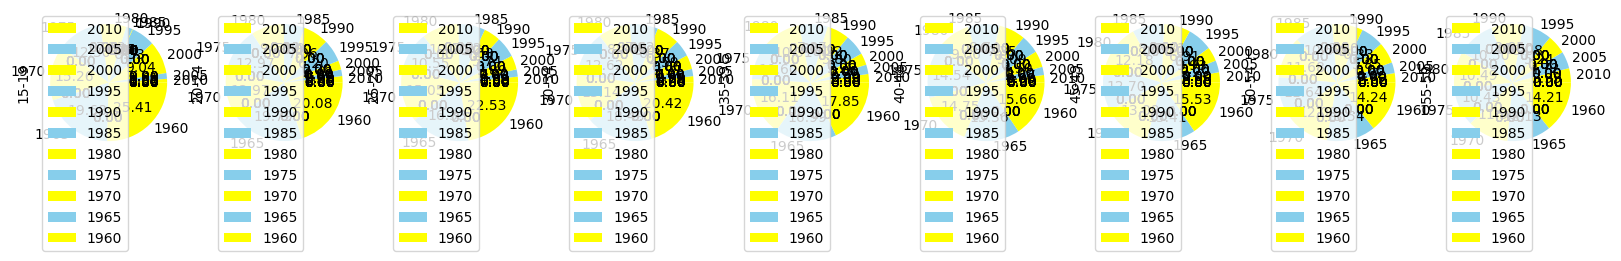

In [ ]:
ax1, ax2 = df.plot.pie(subplots=True,figsize=(20,18), colors=['yellow', 'skyblue'],
                      autopct='%.2f') 
#.plot es un método de pandas que permite graficar directamente desde un DataFrame
#.pie es un metodo de plot que permite hacer gráficos de tipo pie chart

ax1.set_title('Educación femenina USA vs COL', color='skyblue')
ax2.set_title('Educación masculina USA vs COL', color='skyblue')

### Serie de tiempo

Vemos la educacion en la poblacion a lo largo de los años 

In [9]:
!pip install --upgrade wbdata 

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\perez\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
date_time = datetime.datetime(1950,1,1), datetime.datetime(2020,1,1)


# Porcentaje de no educacion en la población
indicadores = {'BAR.NOED.1519.ZS':'15-19','BAR.NOED.2024.ZS':'20-24', 
              'BAR.NOED.2529.ZS':'25-29', 'BAR.NOED.3034.ZS':'30-34',
              'BAR.NOED.3539.ZS':'35-39' , 'BAR.NOED.4044.ZS':'40-44',
              'BAR.NOED.4549.ZS':'45-49', 'BAR.NOED.5054.ZS':'50-54',
              'BAR.NOED.5559.ZS':'55-59'}

data = wbdata.get_dataframe(indicadores, country = 'COL', date = date_time)
df = pd.DataFrame(data=data)

In [ ]:
print('Valores nulos:',sum(df.isna().sum())) # Verifica si hay valores nulos en el DataFrame

Valores nulos: 450


El dataset contiene información desde el año 1950 a 2020 y con datos cada cinco años. Como vamos a enfocarnos en la visualizacion dejamos los datos nulos de lado. 

In [ ]:
df.dropna(inplace=True) # Elimina las filas que contienen valores nulos 
#inplace=True hace que la eliminación se realice en el mismo DataFrame
df

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
date,,,,,,,,,
2010,0.95,1.88,2.09,2.85,4.54,4.54,7.11,7.11,12.09
2005,1.48,1.89,2.58,3.18,4.93,4.93,8.19,8.19,14.29
2000,8.31,2.58,4.98,6.26,6.26,9.77,9.77,15.89,15.89
1995,6.00,6.45,7.35,7.35,11.06,11.06,17.19,17.19,24.48
1990,0.14,7.35,5.92,10.20,11.86,15.98,18.18,23.07,26.81
1985,1.61,5.92,9.50,12.52,14.99,18.99,21.92,28.73,31.81
1980,6.64,9.50,13.06,14.17,19.65,20.98,30.31,31.70,31.78
1975,11.30,13.50,13.50,20.20,20.20,31.60,31.60,31.60,31.60
1970,14.02,13.50,19.26,21.02,30.70,32.04,32.57,32.57,34.43


Breve resumen descriptivo

In [ ]:
df.describe() # Proporciona estadísticas descriptivas del DataFrame

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,8.352727,9.460000,11.634545,14.546364,17.326364,19.752727,22.623636,24.677273,27.542727
std,7.640425,6.895903,8.476270,10.189397,11.009237,11.502175,11.291139,11.105172,9.925342
min,0.140000,1.880000,2.090000,2.850000,4.540000,4.540000,7.110000,7.110000,12.090000
25%,1.545000,4.250000,5.450000,6.805000,8.660000,10.415000,13.480000,16.540000,20.185000
50%,6.640000,7.350000,9.500000,12.520000,14.990000,18.990000,21.920000,28.730000,31.600000
75%,12.660000,13.500000,16.380000,20.610000,25.450000,31.820000,32.085000,32.135000,33.120000
max,23.350000,20.900000,28.840000,32.670000,34.020000,34.020000,38.650000,38.650000,43.040000


Graficamos el porcentaje de la poblacion no educado de toda la población para distintas categorías de edades.

([<matplotlib.axis.XTick at 0x1f3f2cc5130>,
 [Text(0, 0, '15-19'),
  Text(1, 0, '20-24'),
  Text(2, 0, '25-29'),
  Text(3, 0, '30-34'),
  Text(4, 0, '35-39'),
  Text(5, 0, '40-44'),
  Text(6, 0, '45-49'),
  Text(7, 0, '50-54'),
  Text(8, 0, '55-59')])

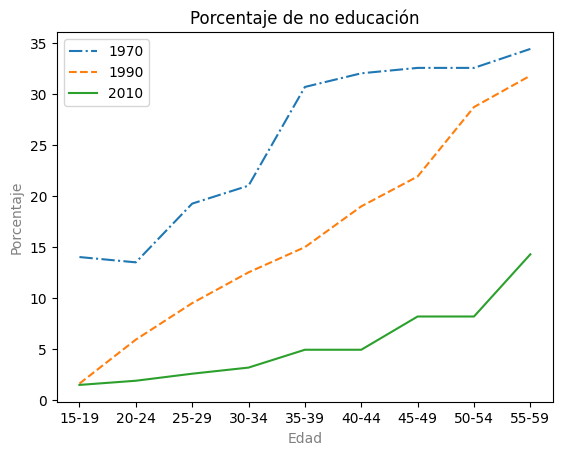

In [ ]:
df.iloc[8,].plot(style = '-.', label = '1970', legend=True) #.iloc es un método de pandas que permite seleccionar filas y columnas por su posición
df.iloc[5,].plot(style = ('--'), label = '1990', legend = True)
df.iloc[1,].plot(style = '-', label = '2010', legend = True)
plt.title('Porcentaje de no educación')
plt.ylabel('Porcentaje',color = 'grey')
plt.xlabel('Edad', color = 'grey')
plt.xticks([0,1,2,3,4,5,6,7,8],df.columns.tolist()) #.columns.tolist() convierte los nombres de las columnas en una lista

Esta vez lo hacemos sólo para la población femenina.

In [18]:
date_time = datetime.datetime(1950,1,1), datetime.datetime(2020,1,1)

# Porcentaje de mujeres sin educacion por rango etario
indicadores = {'BAR.NOED.1519.FE.ZS':'15-19','BAR.NOED.2024.FE.ZS':'20-24', 
              'BAR.NOED.2529.FE.ZS':'25-29', 'BAR.NOED.3034.FE.ZS':'30-34',
              'BAR.NOED.3539.FE.ZS':'35-39' , 'BAR.NOED.4044.FE.ZS':'40-44',
              'BAR.NOED.4549.FE.ZS':'45-49', 'BAR.NOED.5054.FE.ZS':'50-54',
              'BAR.NOED.5559.FE.ZS':'55-59'}

df1 = wbdata.get_dataframe(indicadores, country = 'COL', date=date_time)
df1.dropna(inplace = True)

Porcentaje no educado de la población femenina.

([<matplotlib.axis.XTick at 0x1f3f28862d0>,
 [Text(0, 0, '15-19'),
  Text(1, 0, '20-24'),
  Text(2, 0, '25-29'),
  Text(3, 0, '30-34'),
  Text(4, 0, '35-39'),
  Text(5, 0, '40-44'),
  Text(6, 0, '45-49'),
  Text(7, 0, '50-54'),
  Text(8, 0, '55-59')])

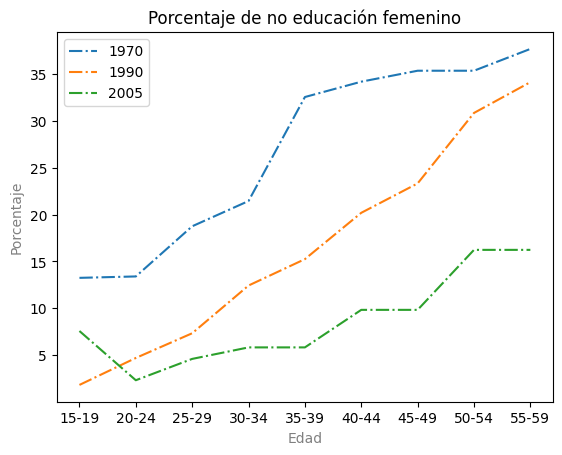

In [20]:
df1.iloc[8,].plot(style = '-.', label = '1970', legend=True)
df1.iloc[5,].plot(style = '-.', label = '1990', legend = True)
df1.iloc[2,].plot(style = '-.', label = '2005', legend = True)
plt.title('Porcentaje de no educación femenino')
plt.ylabel('Porcentaje',color = 'grey')
plt.xlabel('Edad', color = 'grey')
plt.xticks([0,1,2,3,4,5,6,7,8],df.columns.tolist())

Ahora comparamos la educacion de la población total vs población femenina en los años 1970 y 2010. 

([<matplotlib.axis.XTick at 0x1f3f24d1fa0>,
 [Text(0, 0, '15-19'),
  Text(1, 0, '20-24'),
  Text(2, 0, '25-29'),
  Text(3, 0, '30-34'),
  Text(4, 0, '35-39'),
  Text(5, 0, '40-44'),
  Text(6, 0, '45-49'),
  Text(7, 0, '50-54'),
  Text(8, 0, '55-59')])

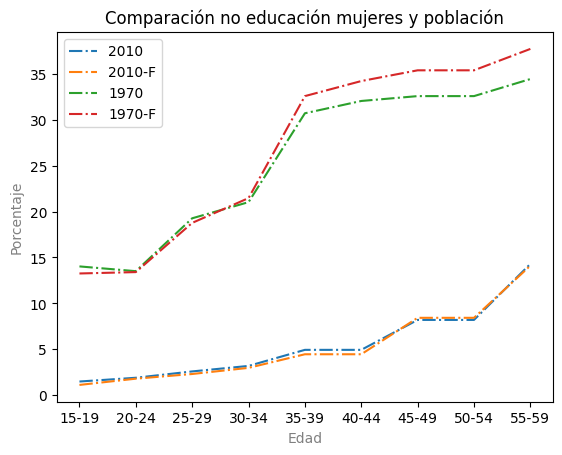

In [29]:
# 2010
df.iloc[1,].plot(style = '-.', label = '2010', legend = True)
df1.iloc[1,].plot(style = '-.', label = '2010-F', legend = True) 
# 1970
df.iloc[8,].plot(style = '-.', label = '1970', legend=True)
df1.iloc[8,].plot(style = '-.', label = '1970-F', legend=True)
plt.title('Comparación no educación mujeres y población')
plt.xlabel('Edad', color = 'grey')
plt.ylabel('Porcentaje', color = 'grey')
plt.xticks([0,1,2,3,4,5,6,7,8],df.columns.tolist())

Vemos que luego de 40 años la brecha se acoto.

## Gráfico de barras


In [28]:
df.head(5)

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
date,,,,,,,,,
2010,0.95,1.88,2.09,2.85,4.54,4.54,7.11,7.11,12.09
2005,1.48,1.89,2.58,3.18,4.93,4.93,8.19,8.19,14.29
2000,8.31,2.58,4.98,6.26,6.26,9.77,9.77,15.89,15.89
1995,6.00,6.45,7.35,7.35,11.06,11.06,17.19,17.19,24.48
1990,0.14,7.35,5.92,10.20,11.86,15.98,18.18,23.07,26.81


Text(0, 0.5, 'Porcentaje')

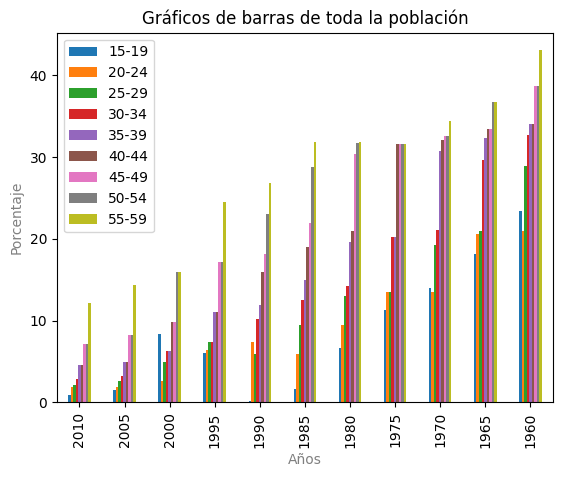

In [27]:
ax = df.plot(kind='bar', title='Gráficos de barras de toda la población')
ax.set_xlabel('Años',color='grey')
ax.set_ylabel('Porcentaje',color='grey')

Lo hacemos en horizontal y apilamos la población en una barra.

Text(0, 0.5, 'Años')

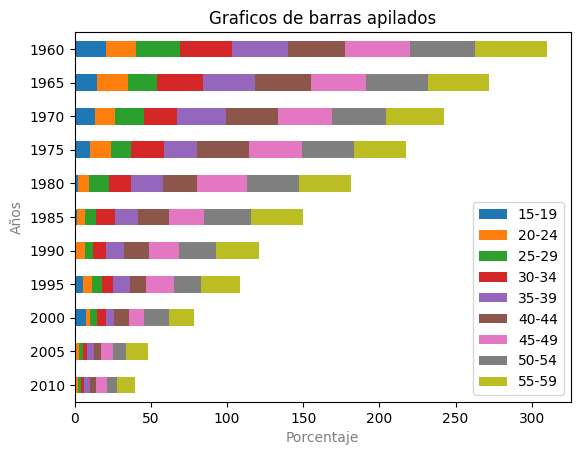

In [26]:
ax = df1.plot.barh(stacked=True)
ax.set_title('Graficos de barras apilados')
ax.set_xlabel('Porcentaje',color='grey')
ax.set_ylabel('Años',color='grey')

## Histogramas

Vamos a trabajar con el [Indice de facilidad para hacer negocios](https://es.wikipedia.org/wiki/%C3%8Dndice_de_facilidad_para_hacer_negocios) en distintos países.


Seleccionamos los paises a utilizar y creamos el dataframe.

In [30]:
paises = [i['id'] for i in wbdata.get_countries(incomelevel=['LIC','HIC'])]

# Seleccionamos nuestros nuevos datos
indicadores = {"IC.BUS.EASE.XQ": "indice_negocio", "NY.GDP.PCAP.PP.KD": "PIBPC"} 

data = wbdata.get_dataframe(indicadores, country=paises, parse_dates=True)   
df = pd.DataFrame(data=data)

RuntimeError: Got error 175 (Invalid format): The indicator was not found. It may have been deleted or archived.

In [24]:
df.dropna(inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2010 to 1960
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   15-19   11 non-null     float64
 1   20-24   11 non-null     float64
 2   25-29   11 non-null     float64
 3   30-34   11 non-null     float64
 4   35-39   11 non-null     float64
 5   40-44   11 non-null     float64
 6   45-49   11 non-null     float64
 7   50-54   11 non-null     float64
 8   55-59   11 non-null     float64
dtypes: float64(9)
memory usage: 880.0+ bytes


In [22]:
df.head()

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
date,,,,,,,,,
2010,0.95,1.88,2.09,2.85,4.54,4.54,7.11,7.11,12.09
2005,1.48,1.89,2.58,3.18,4.93,4.93,8.19,8.19,14.29
2000,8.31,2.58,4.98,6.26,6.26,9.77,9.77,15.89,15.89
1995,6.00,6.45,7.35,7.35,11.06,11.06,17.19,17.19,24.48
1990,0.14,7.35,5.92,10.20,11.86,15.98,18.18,23.07,26.81


In [21]:
plt.figure()
df['PIBPC'].plot.hist(alpha=0.2,  # Con alpha seteamos la transparencia
                     color='purple',
                     bins=9,
                     title='Distribución del PIB per capita',
                     orientation='horizontal')
plt.xlabel('PIB per capita', color='grey')
plt.ylabel('Frecuencia',color='grey')

KeyError: 'PIBPC'

<Figure size 640x480 with 0 Axes>

## Box plot

In [55]:
df['PIBPC'].describe()

count        83.000000
mean      38729.544610
std       29603.492927
min         855.732720
25%        4225.464607
50%       38147.149355
75%       56794.387450
max      131609.099616
Name: PIBPC, dtype: float64

<Axes: title={'center': 'Diagrma de caja PIB'}>

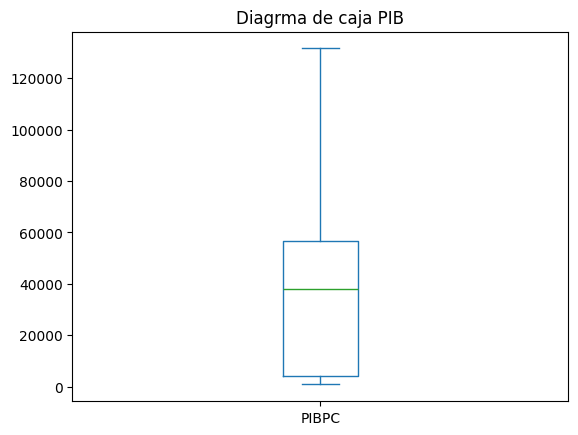

In [54]:
df['PIBPC'].plot.box(title='Diagrma de caja PIB')

Recordamos que dentro de la caja se encuentra el 50% de la población. La línea verde indica la mediana.

## Scatter plot

Hacemos un gráfico de dispersión entre las variables PIB p/ capita e Indice de facilidad p/ hacer negocios.

Text(0, 0.5, 'PIB per capita')

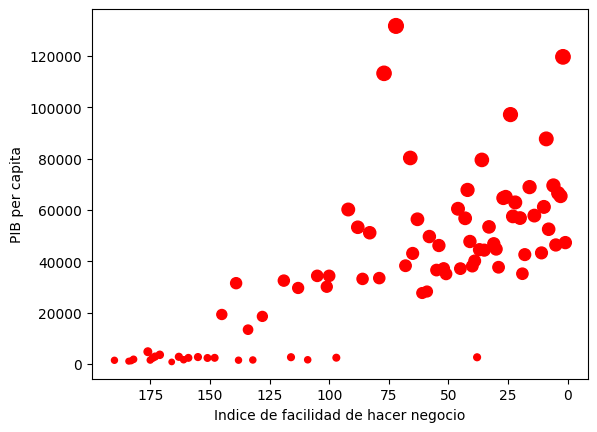

In [56]:
df.plot.scatter(y='PIBPC', x='indice_negocio',
                c='r', 
                s=df['PIBPC']**0.4    # Con s seteamos el tamaño de los puntos
               ) 

plt.gca().invert_xaxis() 
plt.xlabel('Indice de facilidad de hacer negocio')
plt.ylabel('PIB per capita')

Es intuitivo que en los países con más facilidad para los negocios tienen un PIB per capita más alto. 

Finalmente vemos una variante al gráfico de dispersión, un gráfico hexagonal. 

Text(0, 0.5, 'PIB per capita')

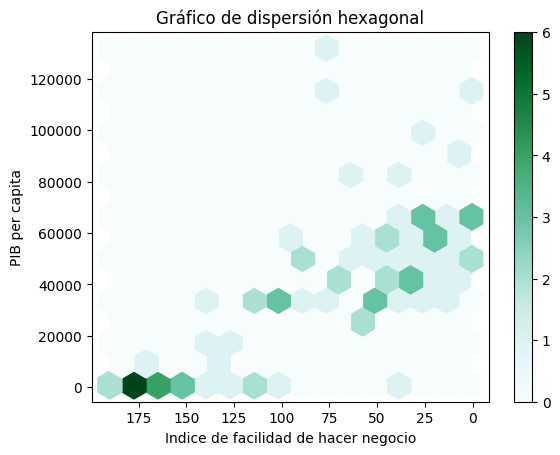

In [57]:
df.plot.hexbin(y='PIBPC', x='indice_negocio', gridsize=15,
              title='Gráfico de dispersión hexagonal')
plt.gca().invert_xaxis()
plt.xlabel('Indice de facilidad de hacer negocio')
plt.ylabel('PIB per capita')

## Ejercicio

Haga un gráfico para ver la evolución de los inscritos a las distintas instancias educativas, diferenciando por género, a lo largo del tiempo. Puede ayudarse con la [documentación](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [60]:
indicadores = {'SE.PRM.ENRR.FE':'primaria-femenino','SE.PRM.ENRR.MA':'primaria-masculino',
               'SE.SEC.ENRR.FE':'bachillerato-femenino','SE.SEC.ENRR.MA':'bachillerato-masculino',
               'SE.TER.ENRR.FE':'universitario-femenino','SE.TER.ENRR.MA':'universitario-masculino'}

df = wbdata.get_dataframe(indicadores,country='COL')

In [62]:
df.head()

,primaria-femenino,primaria-masculino,bachillerato-femenino,bachillerato-masculino,universitario-femenino,universitario-masculino
date,,,,,,
2023,NaN,NaN,NaN,NaN,NaN,NaN
2022,103.431541,106.170021,103.587738,99.642464,64.322350,54.404388
2021,104.689774,108.210350,105.227257,100.840187,63.163052,53.602249
2020,105.158592,108.926193,103.599342,99.484848,59.842480,51.731529
2019,107.470139,111.159050,104.421806,99.653450,60.514229,52.919128


Utilize el período [2000-2020].

In [ ]:
# df.iloc...

Una vez que tenga los datos a utilizar realice el gráfico. Pruebe agregarle una leyenda y cambiar el color. Tambíen puede etiquetar los ejes y elegir un título.

In [ ]:
# df.plot...